In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# 데이터셋 불러오기 : UCI HAR Dataset
# 사람의 허리에 센서를 부착하고 센서 Reading으로 부터 사람의 행동을 예측하는 데이터셋
# 561개의 Feature와 6개의 Class로 이루어져 있다. (걷기, 계단 오르기, 계단 내리기, 앉기, 서기, 눕기)

def get_human_dataset():
    feature_name_df = pd.read_csv("UCI HAR Dataset/features.txt", sep="\s+", header=None, names=["column_index", "column_name"])

    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    for i in range(len(feature_name)):
        feature_name[i] = feature_name[i] + str(i)

    X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", sep="\s+", header=None, names=feature_name)
    X_train.columns = [feature_name]
    X_test = pd.read_csv("UCI HAR Dataset/test/X_test.txt", sep="\s+", header=None, names=feature_name)
    X_test.columns = [feature_name]
    y_train = pd.read_csv("UCI HAR Dataset/train/y_train.txt", sep="\s+", header=None, names=["action"])
    y_test = pd.read_csv("UCI HAR Dataset/test/y_test.txt", sep="\s+", header=None, names=["action"])

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = get_human_dataset()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Noh\AppData\Local\Temp\ipykernel_15436\1778029893.py:2: SyntaxWarning: invalid escape sequence '\s'
  feature_name_df = pd.read_csv("UCI HAR Dataset/features.txt", sep="\s+", header=None, names=["column_index", "column_name"])
C:\Users\Noh\AppData\Local\Temp\ipykernel_15436\1778029893.py:8: SyntaxWarning: invalid escape sequence '\s'
  X_train = pd.read_csv("UCI HAR Dataset/train/X_train.txt", sep="\s+", header=None, names=feature_name)
C:\Users\Noh\AppData\Local\Temp\ipykernel_15

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7352, 561)
(2947, 561)
(7352, 1)
(2947, 1)


In [7]:
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("정확도 : {0:.4f}".format(accuracy))

c:\Users\Noh\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


정확도 : 0.9253


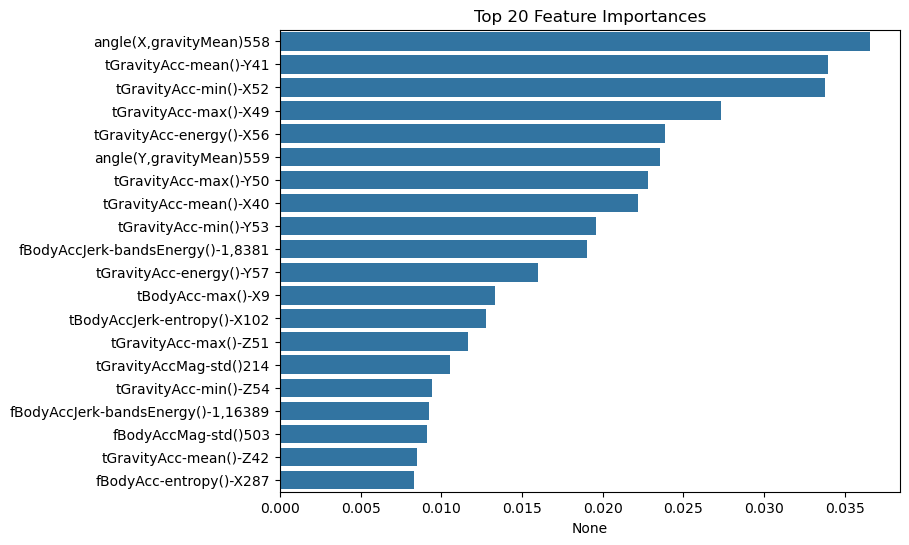

In [9]:
# Feature Importance 시각화
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=np.squeeze(ftr_top20.index.to_list()))
plt.show()